* This is an example KNN algorithm with iris data set that
  each flower image is classified by either ('virginia', '')

Size of data :(150, 4)
Target value : [0 1 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[0. 0. 1.]]
['virginica']
{'n_neighbors': 10, 'weights': 'distance'}


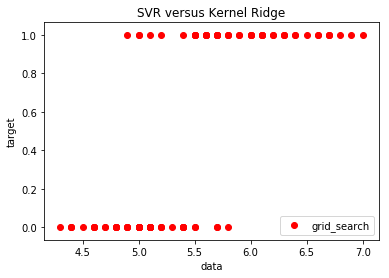

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X, y = iris.data, iris.target
print('Size of data :%s' % (X.shape, ))
print('Target value : %s' % np.unique(y))
print(X[0:10, :])
sample = [[6, 4, 6, 2],]

knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X,y)

predicted_value = knn.predict(sample)
print(knn.predict_proba(sample))
print(iris.target_names[predicted_value])

parameters = {'n_neighbors':(1, 3, 10), 'weights':('uniform', 'distance')}
knn_base = KNeighborsClassifier()
grid_search = GridSearchCV(cv=5, estimator=knn_base, param_grid=parameters, scoring='accuracy', n_jobs=5)
grid_search.fit(X, y)
print(grid_search.best_params_)

y_svr = grid_search.predict(X)

plt.scatter(X[:100, 0], y_svr[:100], c='r', zorder=1, label='grid_search')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()
plt.show()
